# Import Data

In [1]:
#Import library yang dibutuhkan
import numpy as np
import io
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import style
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
train_df = pd.read_csv("Data Train.csv")
test_df = pd.read_csv("Data Test.csv")

# Data Exploration/Analysis

In [3]:
#Melihat 5 data paling awal
train_df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [4]:
#Melihat 5 data terakhir
train_df.tail()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
4245,MT,83,area_code_415,no,no,0,188.3,70,32.01,243.8,88,20.72,213.7,79,9.62,10.3,6,2.78,0,no
4246,WV,73,area_code_408,no,no,0,177.9,89,30.24,131.2,82,11.15,186.2,89,8.38,11.5,6,3.11,3,no
4247,NC,75,area_code_408,no,no,0,170.7,101,29.02,193.1,126,16.41,129.1,104,5.81,6.9,7,1.86,1,no
4248,HI,50,area_code_408,no,yes,40,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,9.9,5,2.67,2,no
4249,VT,86,area_code_415,no,yes,34,129.4,102,22.00,267.1,104,22.70,154.8,100,6.97,9.3,16,2.51,0,no


In [5]:
#Describe data numerik
train_df.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000
mean,100.236235,7.631765,180.259600,99.907294,30.644682,200.173906,100.176471,17.015012,200.527882,99.839529,9.023892,10.256071,4.426353,2.769654,1.559059
std,39.698401,13.439882,54.012373,19.850817,9.182096,50.249518,19.908591,4.271212,50.353548,20.093220,2.265922,2.760102,2.463069,0.745204,1.311434
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,143.325000,87.000000,24.365000,165.925000,87.000000,14.102500,167.225000,86.000000,7.522500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,0.000000,180.450000,100.000000,30.680000,200.700000,100.000000,17.060000,200.450000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,16.000000,216.200000,113.000000,36.750000,233.775000,114.000000,19.867500,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.000000,52.000000,351.500000,165.000000,59.760000,359.300000,170.000000,30.540000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [6]:
#Describe Data String
train_df.describe(include='O')

,state,area_code,international_plan,voice_mail_plan,churn
count,4250,4250,4250,4250,4250
unique,51,3,2,2,2
top,WV,area_code_415,no,no,no
freq,139,2108,3854,3138,3652


In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

Data train memiliki 4250 sampel dan 19 features dan target variabel (churn). 8 features memiliki tipe data float, 7 features memiliki tipe data integer, dan 5 features memiliki tipe data string atau object

In [8]:
#Analisa Kategorikal
for col_name in list (['area_code', 'international_plan', 'voice_mail_plan',  'churn']):
  print('\nUnique values count', col_name)
  print(train_df[col_name].value_counts())


Unique values count area_code
area_code_415    2108
area_code_408    1086
area_code_510    1056
Name: area_code, dtype: int64

Unique values count international_plan
no     3854
yes     396
Name: international_plan, dtype: int64

Unique values count voice_mail_plan
no     3138
yes    1112
Name: voice_mail_plan, dtype: int64

Unique values count churn
no     3652
yes     598
Name: churn, dtype: int64


In [9]:
def with_per(total, axis):
    for p in axis.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width()
        y = p.get_height()
        ax.annotate(percentage, (x, y),ha='center')

In [10]:
cat_var = ['state', 'area_code', 'international_plan', 'voice_mail_plan']
print('List of categorical variables {}'.format(cat_var))

List of categorical variables ['state', 'area_code', 'international_plan', 'voice_mail_plan']


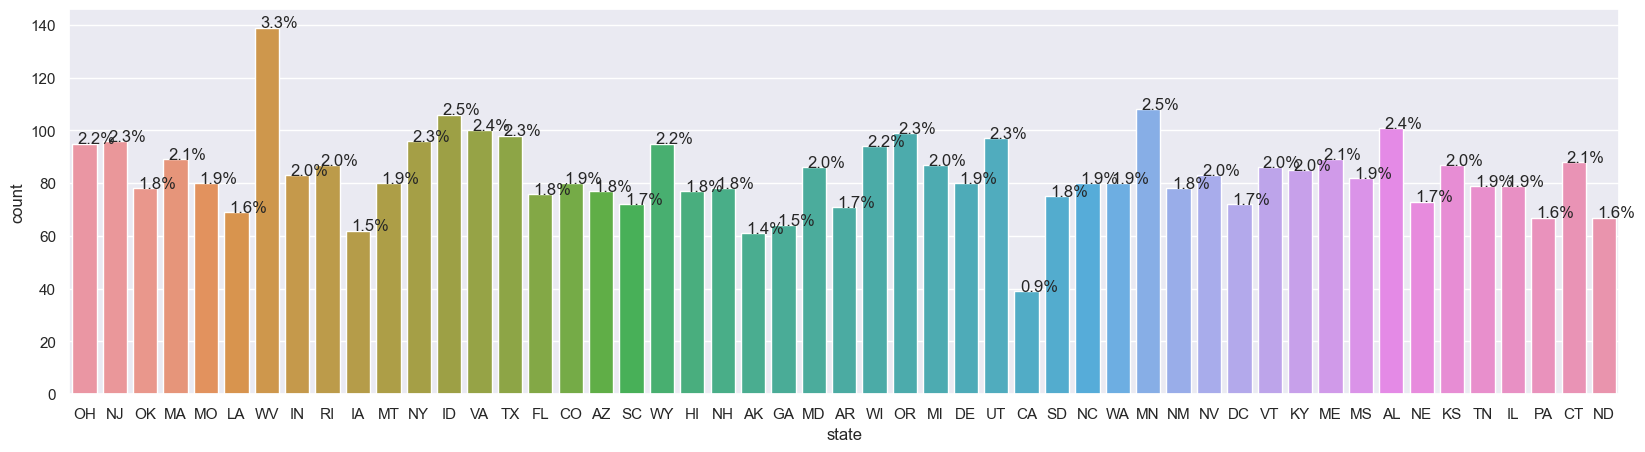

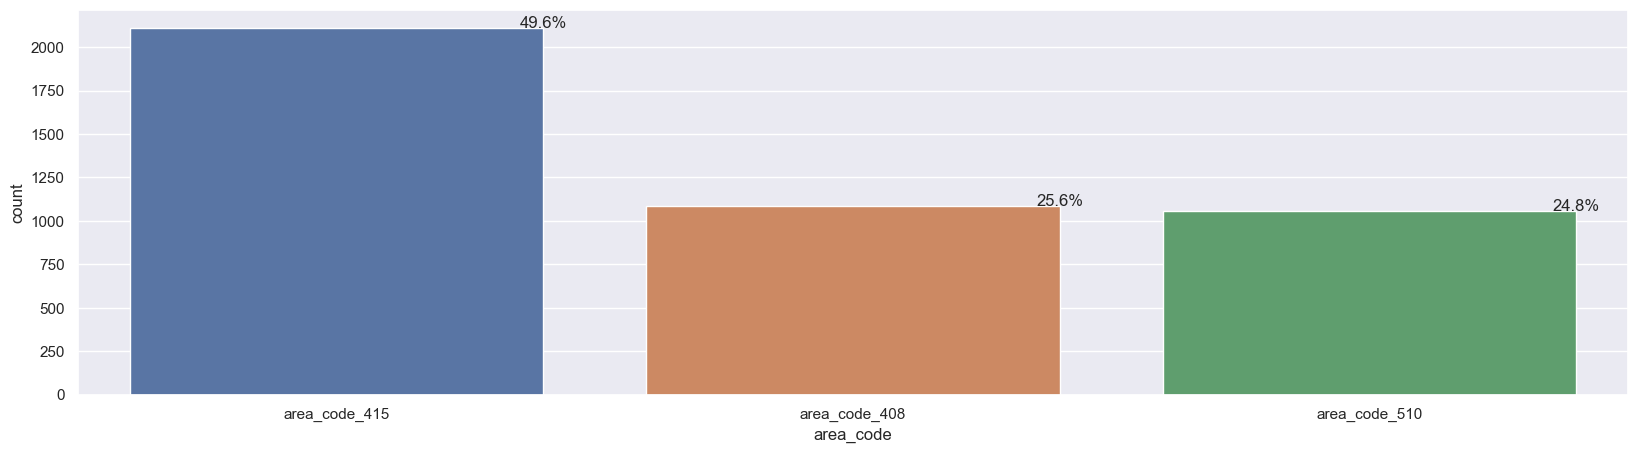

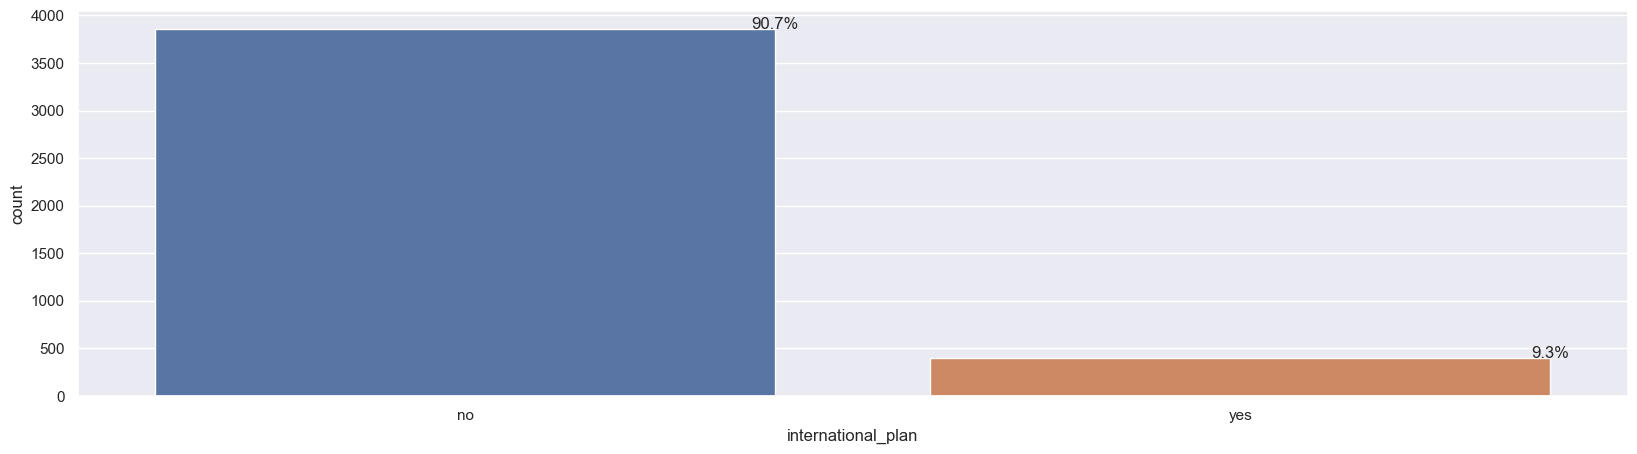

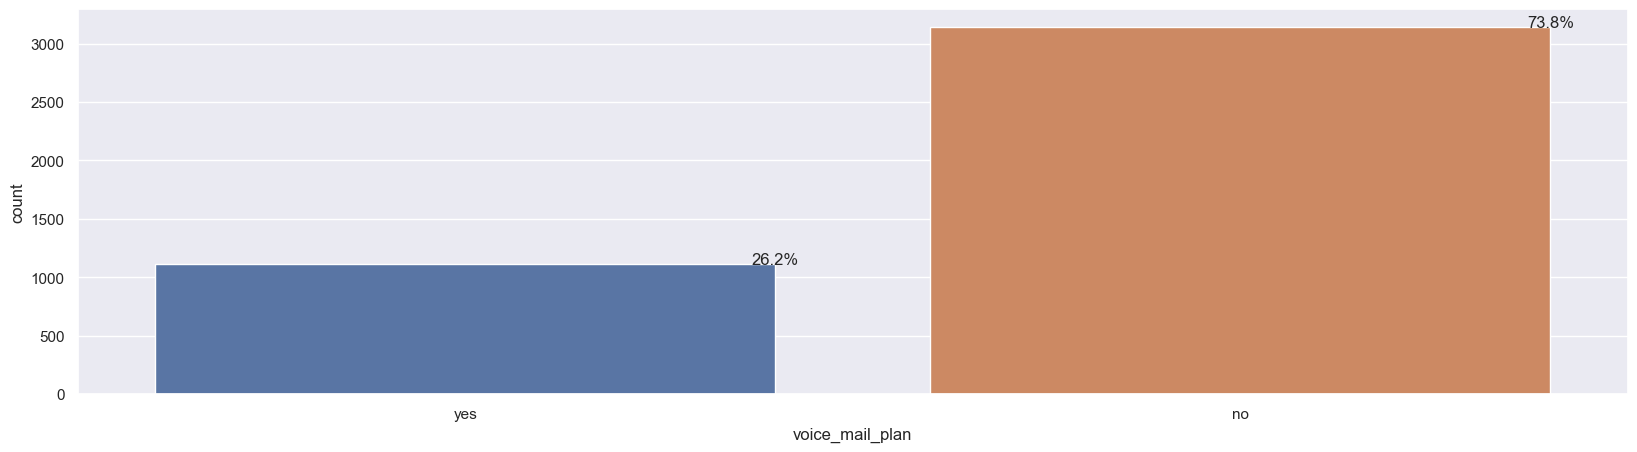

In [11]:
for feature in cat_var:
    sns.set(style = 'darkgrid')
    plt.figure(figsize=(20,5))
    total = len(train_df)
    ax = sns.countplot(x = train_df[feature], data = train_df)
    #plt.title(feature)
    with_per(total, ax)
    plt.show()

Dapat dilihat dari plot diatas

*   49,6% pelanggan tinggal di area_code_415
*   90,7% pelanggan tidak memiliki international_plan
*   73,8% pelanggan tidak memiliki voice_mail_plan

In [12]:
Numcusstayed =  train_df[train_df.churn == 'no'].shape[0]
Numcuschurned = train_df[train_df.churn == 'yes'].shape[0]
print('Customers Stayed:', Numcusstayed)
print('Customer Churned:', Numcuschurned)

Customers Stayed: 3652
Customer Churned: 598


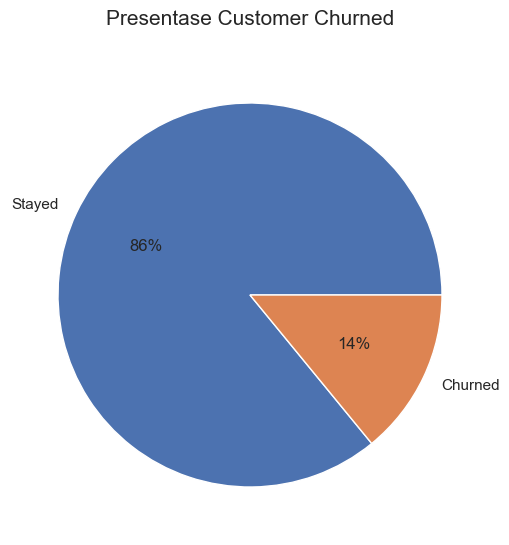

In [13]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis = ('equal')
labels = ['Stayed', 'Churned']
churn = train_df.churn.value_counts()
ax.pie(churn, labels = labels, autopct='%.0f%%')
plt.title('Presentase Customer Churned\n', fontsize=15)
plt.show()

Dari data diatas dapat dilihat bahwa sebanyak 598 atau sekitar 14% customer berhenti menggunakan pelayanan, sedangkan sebanyak 3652 atau sekitar 86% tetap menggunakan pelayanan dari perusahaan tersebut.

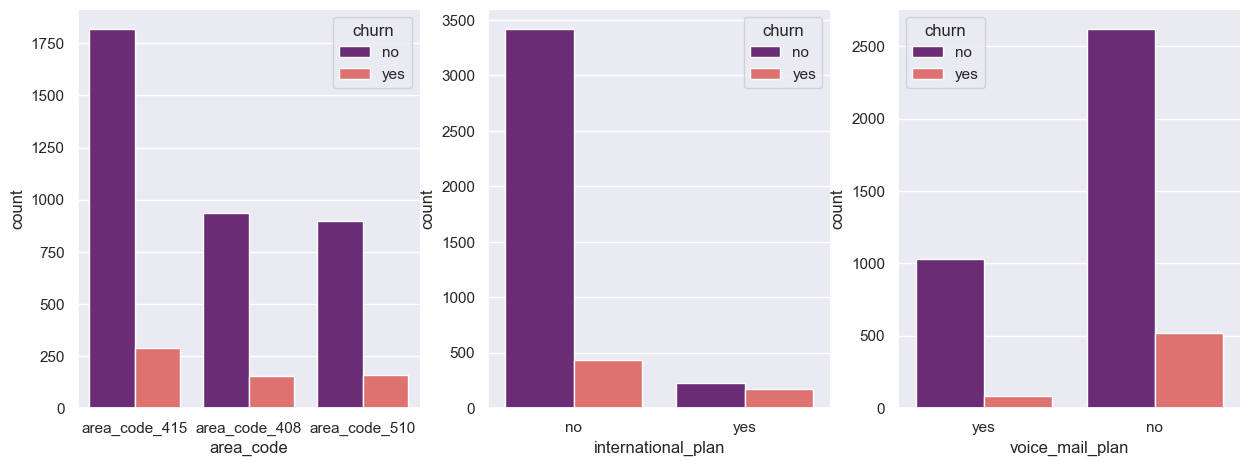

In [14]:
fig = plt.figure(figsize=(15,30))
gs = fig.add_gridspec(5,3)

ax_areaCode = fig.add_subplot(gs[0,0])
sns.countplot(x='area_code', hue='churn', data=train_df, ax=ax_areaCode, palette='magma')
sns.despine()

ax_internationalPlan = fig.add_subplot(gs[0,1])
sns.countplot(x='international_plan', hue='churn', data=train_df, ax=ax_internationalPlan, palette='magma')
sns.despine()

ax_voiceMailPlan = fig.add_subplot(gs[0,2])
sns.countplot(x='voice_mail_plan', hue='churn', data=train_df, ax=ax_voiceMailPlan, palette='magma')
sns.despine()

Dari grafik diatas sebagian besar pelanggan yang berhenti berlangganan adalah mereka yang tidak memiliki international plan dan juga voice mail plan

In [15]:
num_var = [feature for feature in train_df.columns if train_df[feature].dtypes != 'O']
print('List of Numerical featues {}'.format(num_var))

List of Numerical featues ['account_length', 'number_vmail_messages', 'total_day_minutes', 'total_day_calls', 'total_day_charge', 'total_eve_minutes', 'total_eve_calls', 'total_eve_charge', 'total_night_minutes', 'total_night_calls', 'total_night_charge', 'total_intl_minutes', 'total_intl_calls', 'total_intl_charge', 'number_customer_service_calls']


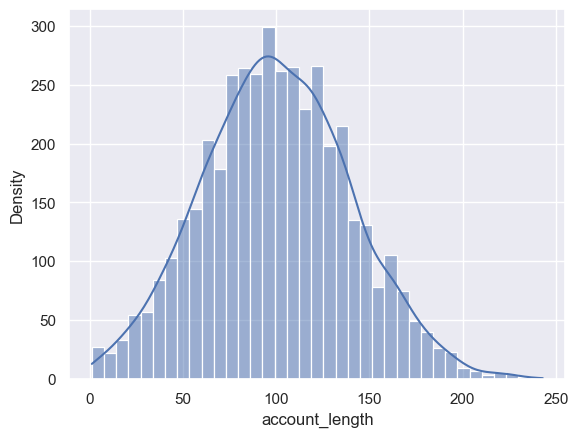

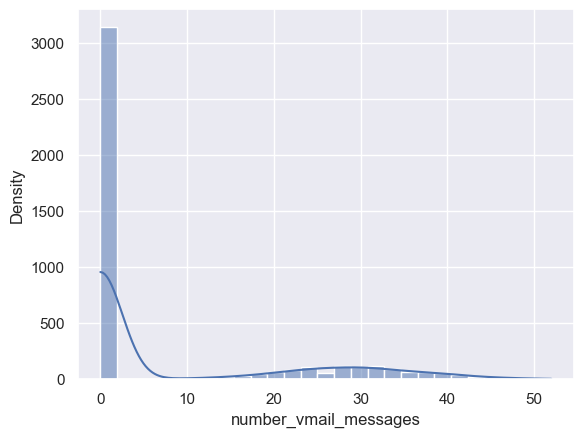

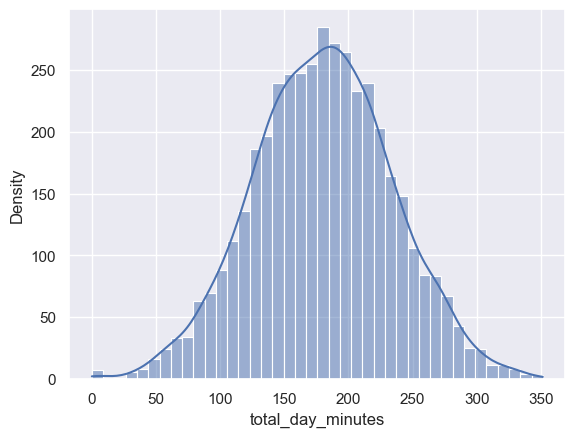

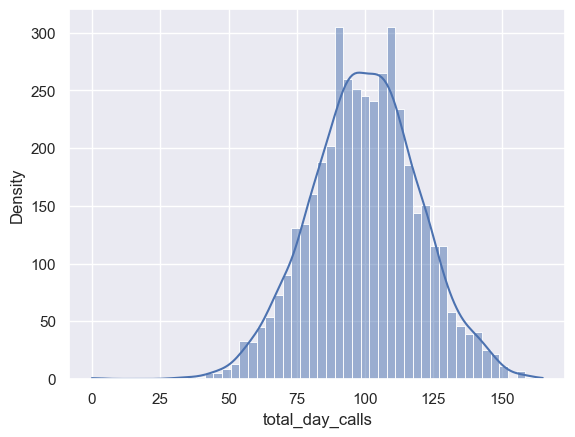

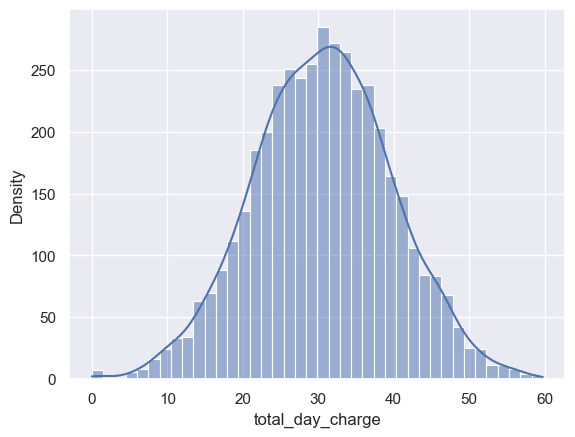

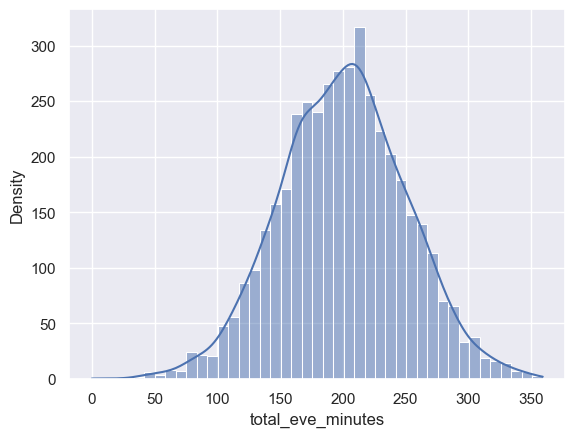

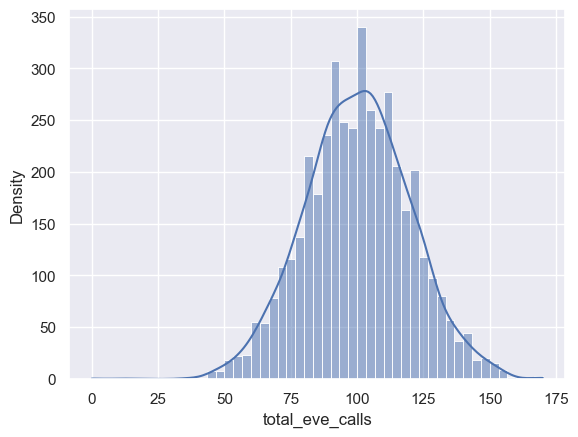

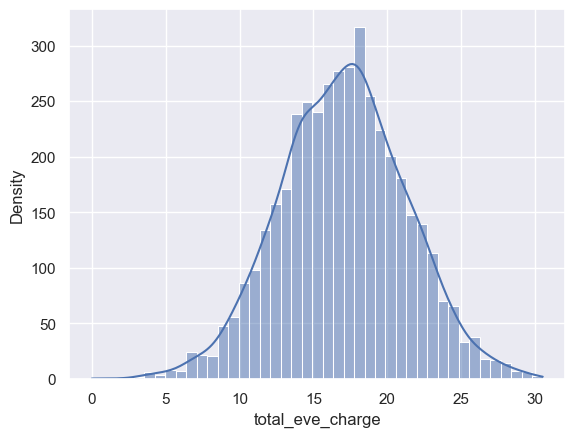

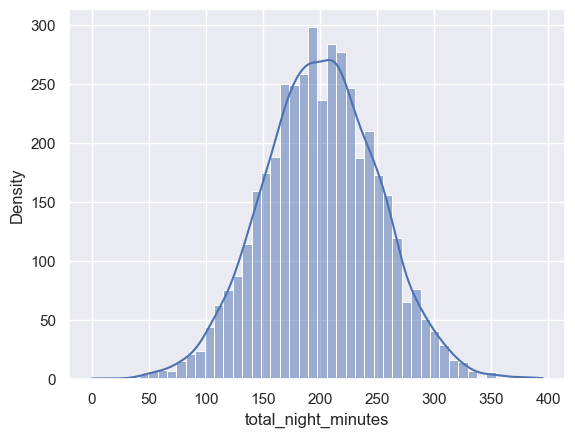

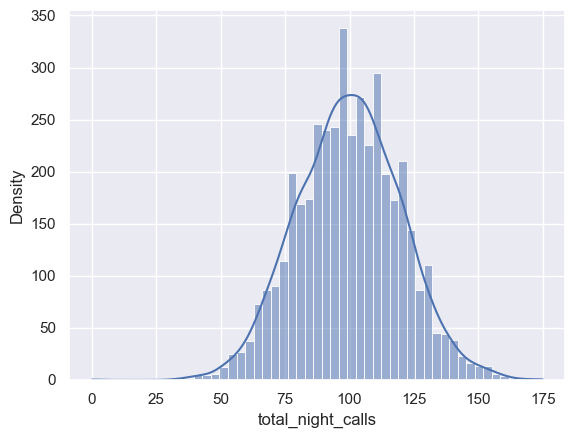

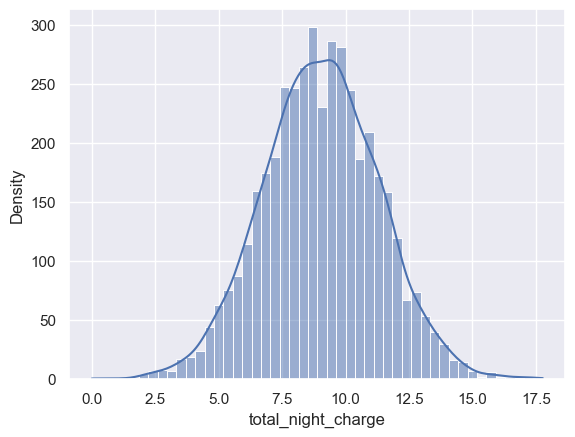

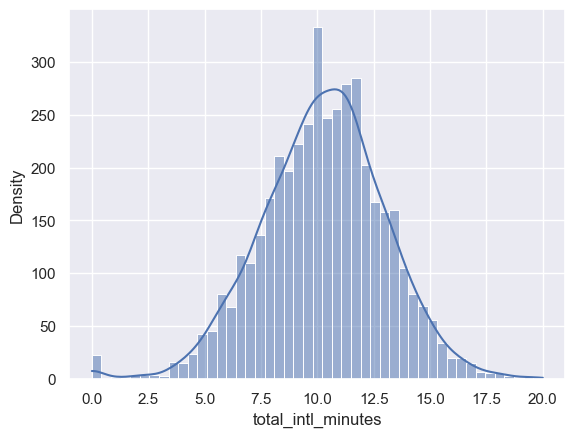

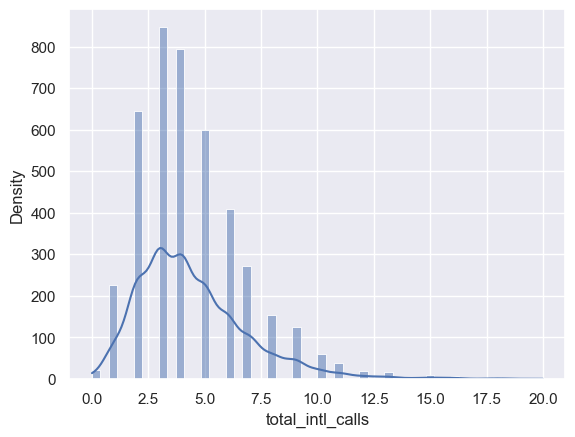

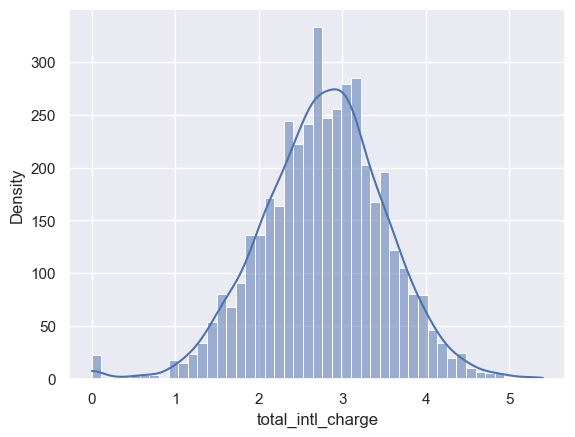

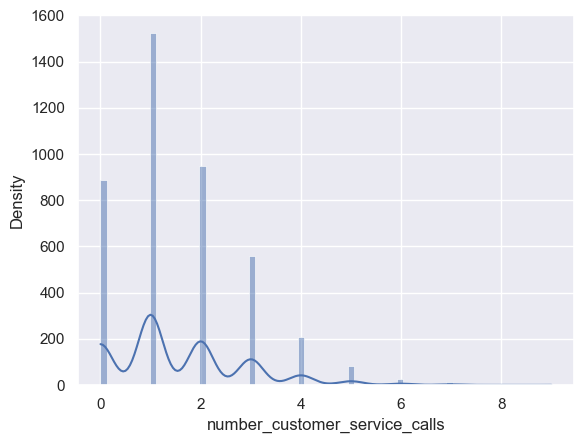

In [16]:
for feature in num_var:
    sns.histplot(train_df[feature], kde=True)
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.show()

Number_customer_service_calls, total_intl_call dan Number_vmail_messages bukan merupakan distribusi normal sehingga kita dapat mengubahnya menjadi distribusi normal dalam langkah data prepocesing.
Selain fitur di atas, semuanya terlihat seperti distribusi normal.

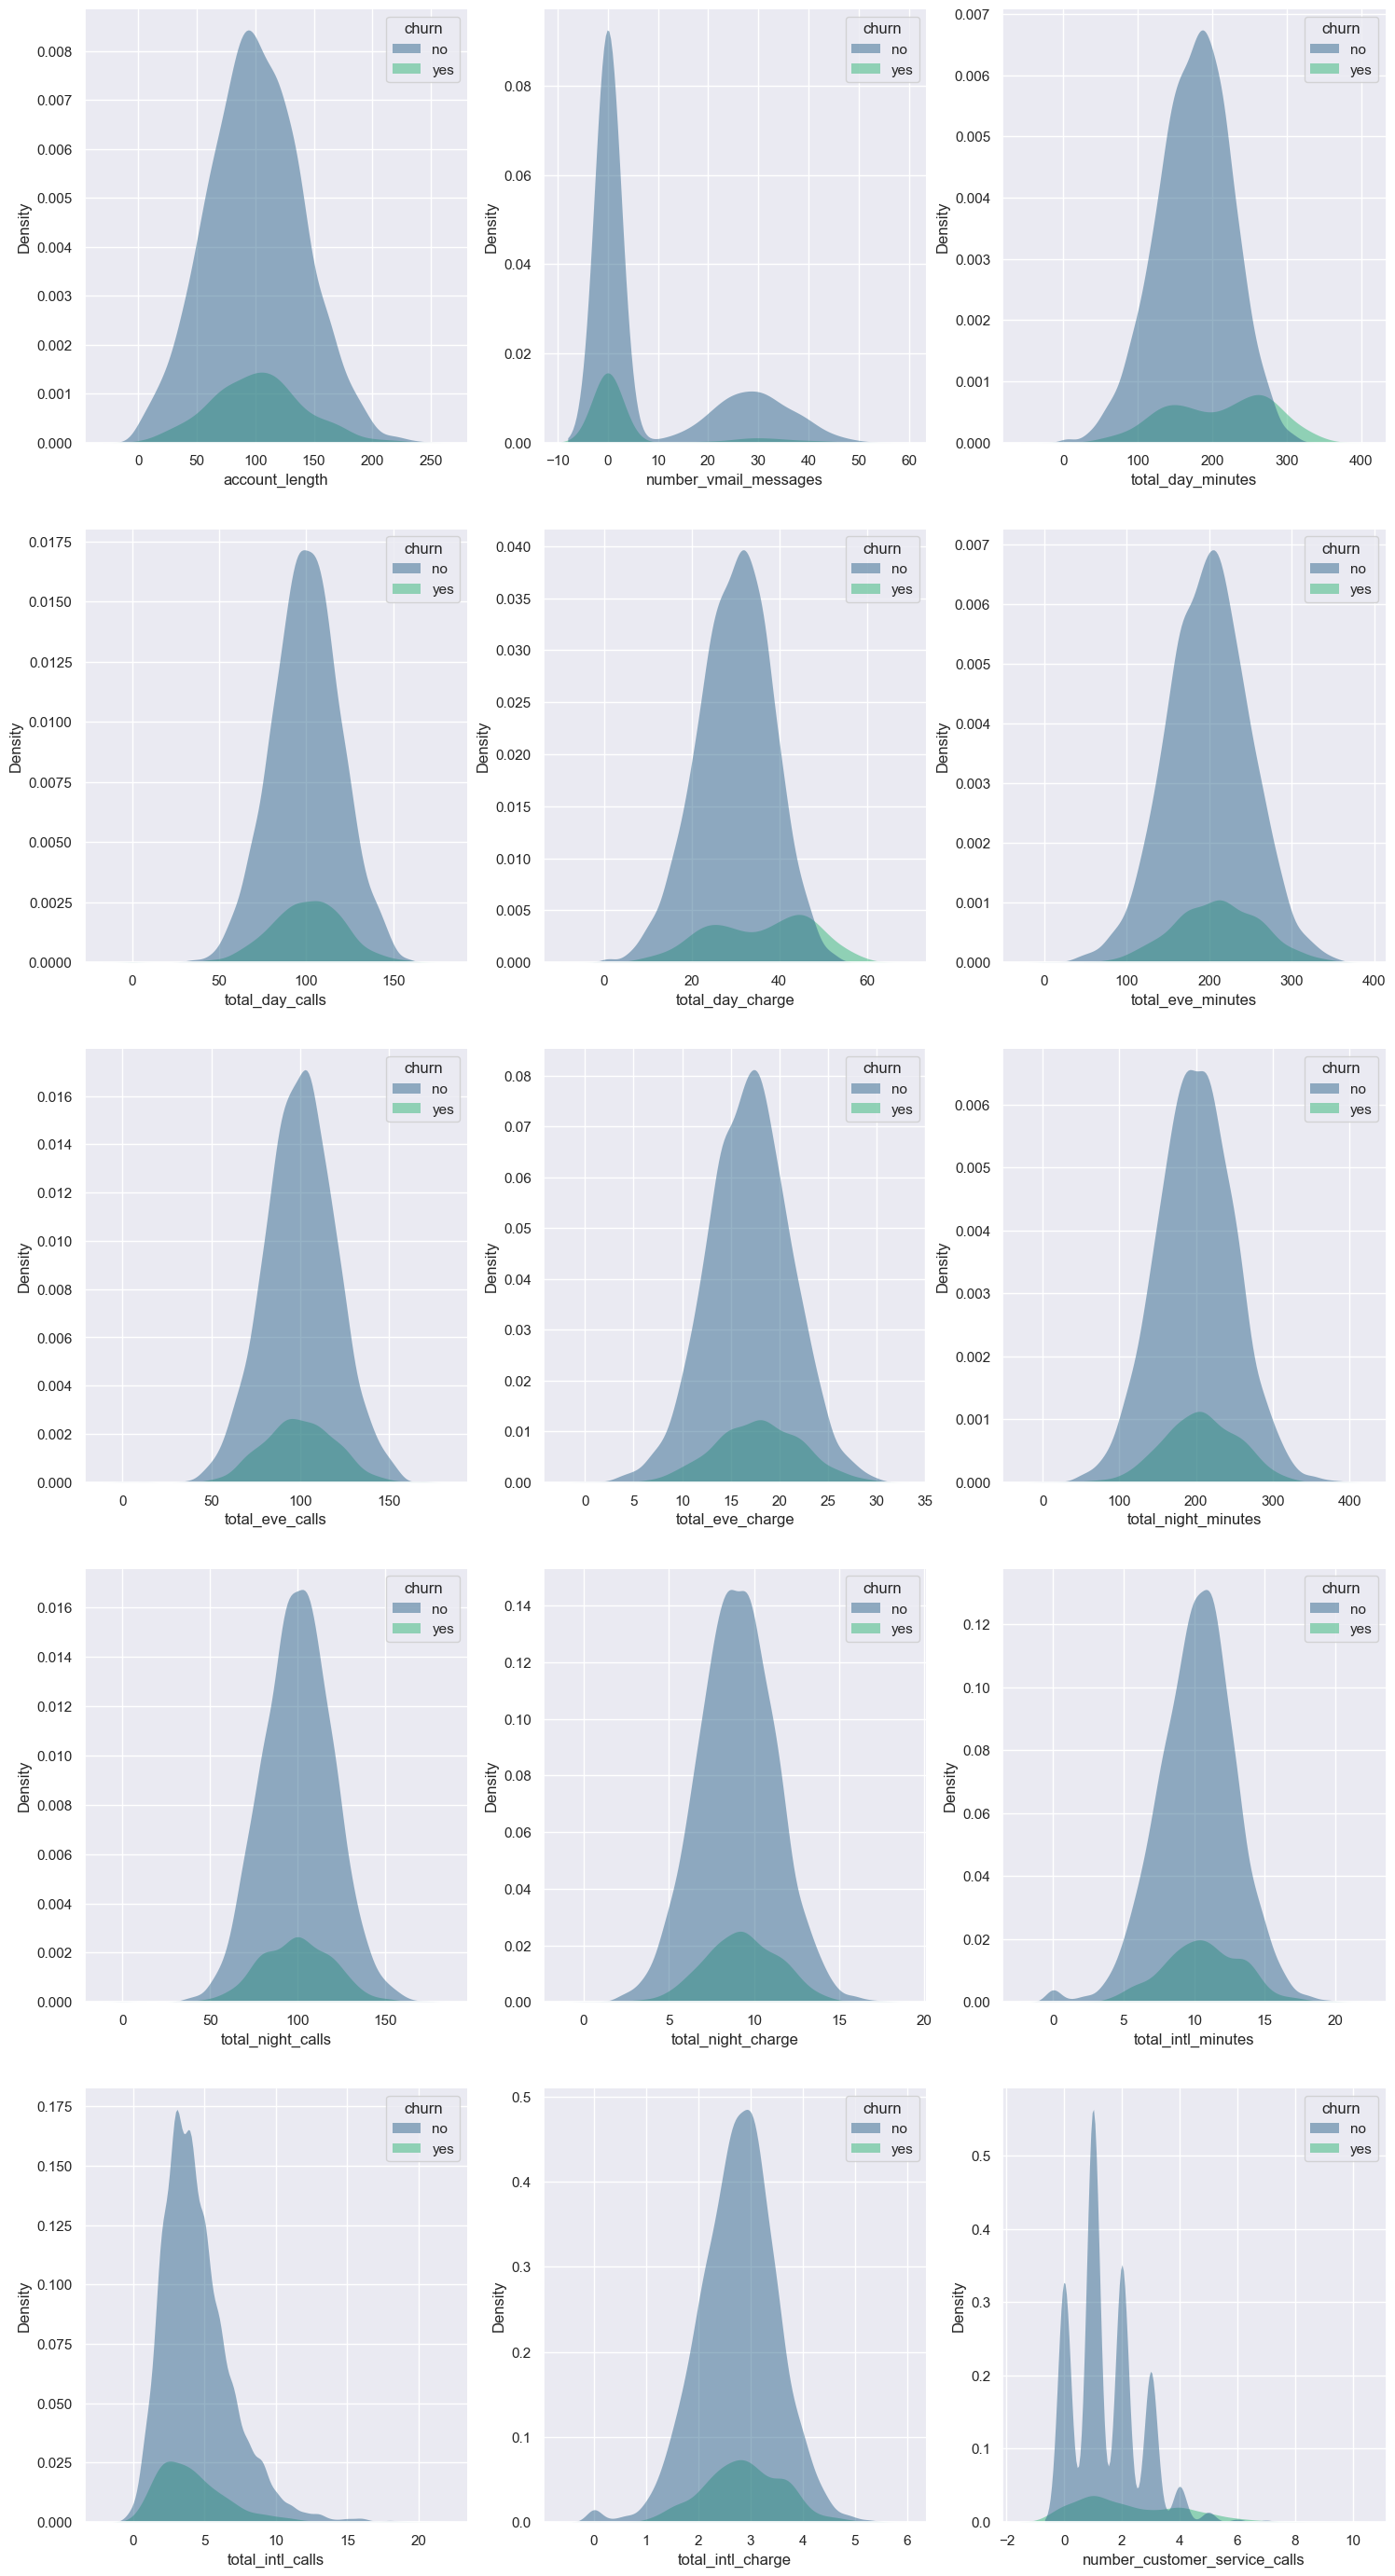

In [17]:
#Analisa Numerik

fig = plt.figure(figsize=(18,35))
gs = fig.add_gridspec(5,3)

ax_accountLength  = fig.add_subplot(gs[0,0])
sns.kdeplot(x='account_length', hue='churn', data=train_df, fill=True, alpha=.5, linewidth=0, ax=ax_accountLength, palette='viridis')
sns.despine()

ax_numberVmailMessages = fig.add_subplot(gs[0,1])
sns.kdeplot(x='number_vmail_messages', hue='churn', data=train_df, fill=True, alpha=.5, linewidth=0, ax=ax_numberVmailMessages, palette='viridis')
sns.despine()

ax_totalDayMinutes = fig.add_subplot(gs[0,2])
sns.kdeplot(x='total_day_minutes', hue='churn', data=train_df, fill=True, alpha=.5, linewidth=0, ax=ax_totalDayMinutes, palette='viridis')
sns.despine()

ax_totalDayCalls = fig.add_subplot(gs[1,0])
sns.kdeplot(x='total_day_calls', hue='churn', data=train_df, fill=True, alpha=.5, linewidth=0, ax=ax_totalDayCalls, palette='viridis')
sns.despine()

ax_totalDayCharge = fig.add_subplot(gs[1,1])
sns.kdeplot(x='total_day_charge', hue='churn', data=train_df, fill=True, alpha=.5, linewidth=0, ax=ax_totalDayCharge, palette='viridis')
sns.despine()

ax_totalEveMinutes = fig.add_subplot(gs[1,2])
sns.kdeplot(x='total_eve_minutes', hue='churn', data=train_df, fill=True, alpha=.5, linewidth=0, ax=ax_totalEveMinutes, palette='viridis')
sns.despine()

ax_totalEveCalls = fig.add_subplot(gs[2,0])
sns.kdeplot(x='total_eve_calls', hue='churn', data=train_df, fill=True, alpha=.5, linewidth=0, ax=ax_totalEveCalls, palette='viridis')
sns.despine()

ax_totalEveCharge = fig.add_subplot(gs[2,1])
sns.kdeplot(x='total_eve_charge', hue='churn', data=train_df, fill=True, alpha=.5, linewidth=0, ax=ax_totalEveCharge, palette='viridis')
sns.despine()

ax_totalNightMinutes = fig.add_subplot(gs[2,2])
sns.kdeplot(x='total_night_minutes', hue='churn', data=train_df, fill=True, alpha=.5, linewidth=0, ax=ax_totalNightMinutes, palette='viridis')
sns.despine()

ax_totalNightCalls = fig.add_subplot(gs[3,0])
sns.kdeplot(x='total_night_calls', hue='churn', data=train_df, fill=True, alpha=.5, linewidth=0, ax=ax_totalNightCalls, palette='viridis')
sns.despine()

ax_totalNightCharge = fig.add_subplot(gs[3,1])
sns.kdeplot(x='total_night_charge', hue='churn', data=train_df, fill=True, alpha=.5, linewidth=0, ax=ax_totalNightCharge, palette='viridis')
sns.despine()

ax_totalIntlMinutes = fig.add_subplot(gs[3,2])
sns.kdeplot(x='total_intl_minutes', hue='churn', data=train_df, fill=True, alpha=.5, linewidth=0, ax=ax_totalIntlMinutes, palette='viridis')
sns.despine()

ax_totalIntlCalls = fig.add_subplot(gs[4,0])
sns.kdeplot(x='total_intl_calls', hue='churn', data=train_df, fill=True, alpha=.5, linewidth=0, ax=ax_totalIntlCalls, palette='viridis')
sns.despine()

ax_totalIntlCharge = fig.add_subplot(gs[4,1])
sns.kdeplot(x='total_intl_charge', hue='churn', data=train_df, fill=True, alpha=.5, linewidth=0, ax=ax_totalIntlCharge, palette='viridis')
sns.despine()

ax_numberCustomerServiceCalls  = fig.add_subplot(gs[4,2])
sns.kdeplot(x='number_customer_service_calls', hue='churn', data=train_df, fill=True, alpha=.5, linewidth=0, ax=ax_numberCustomerServiceCalls, palette='viridis')
sns.despine()

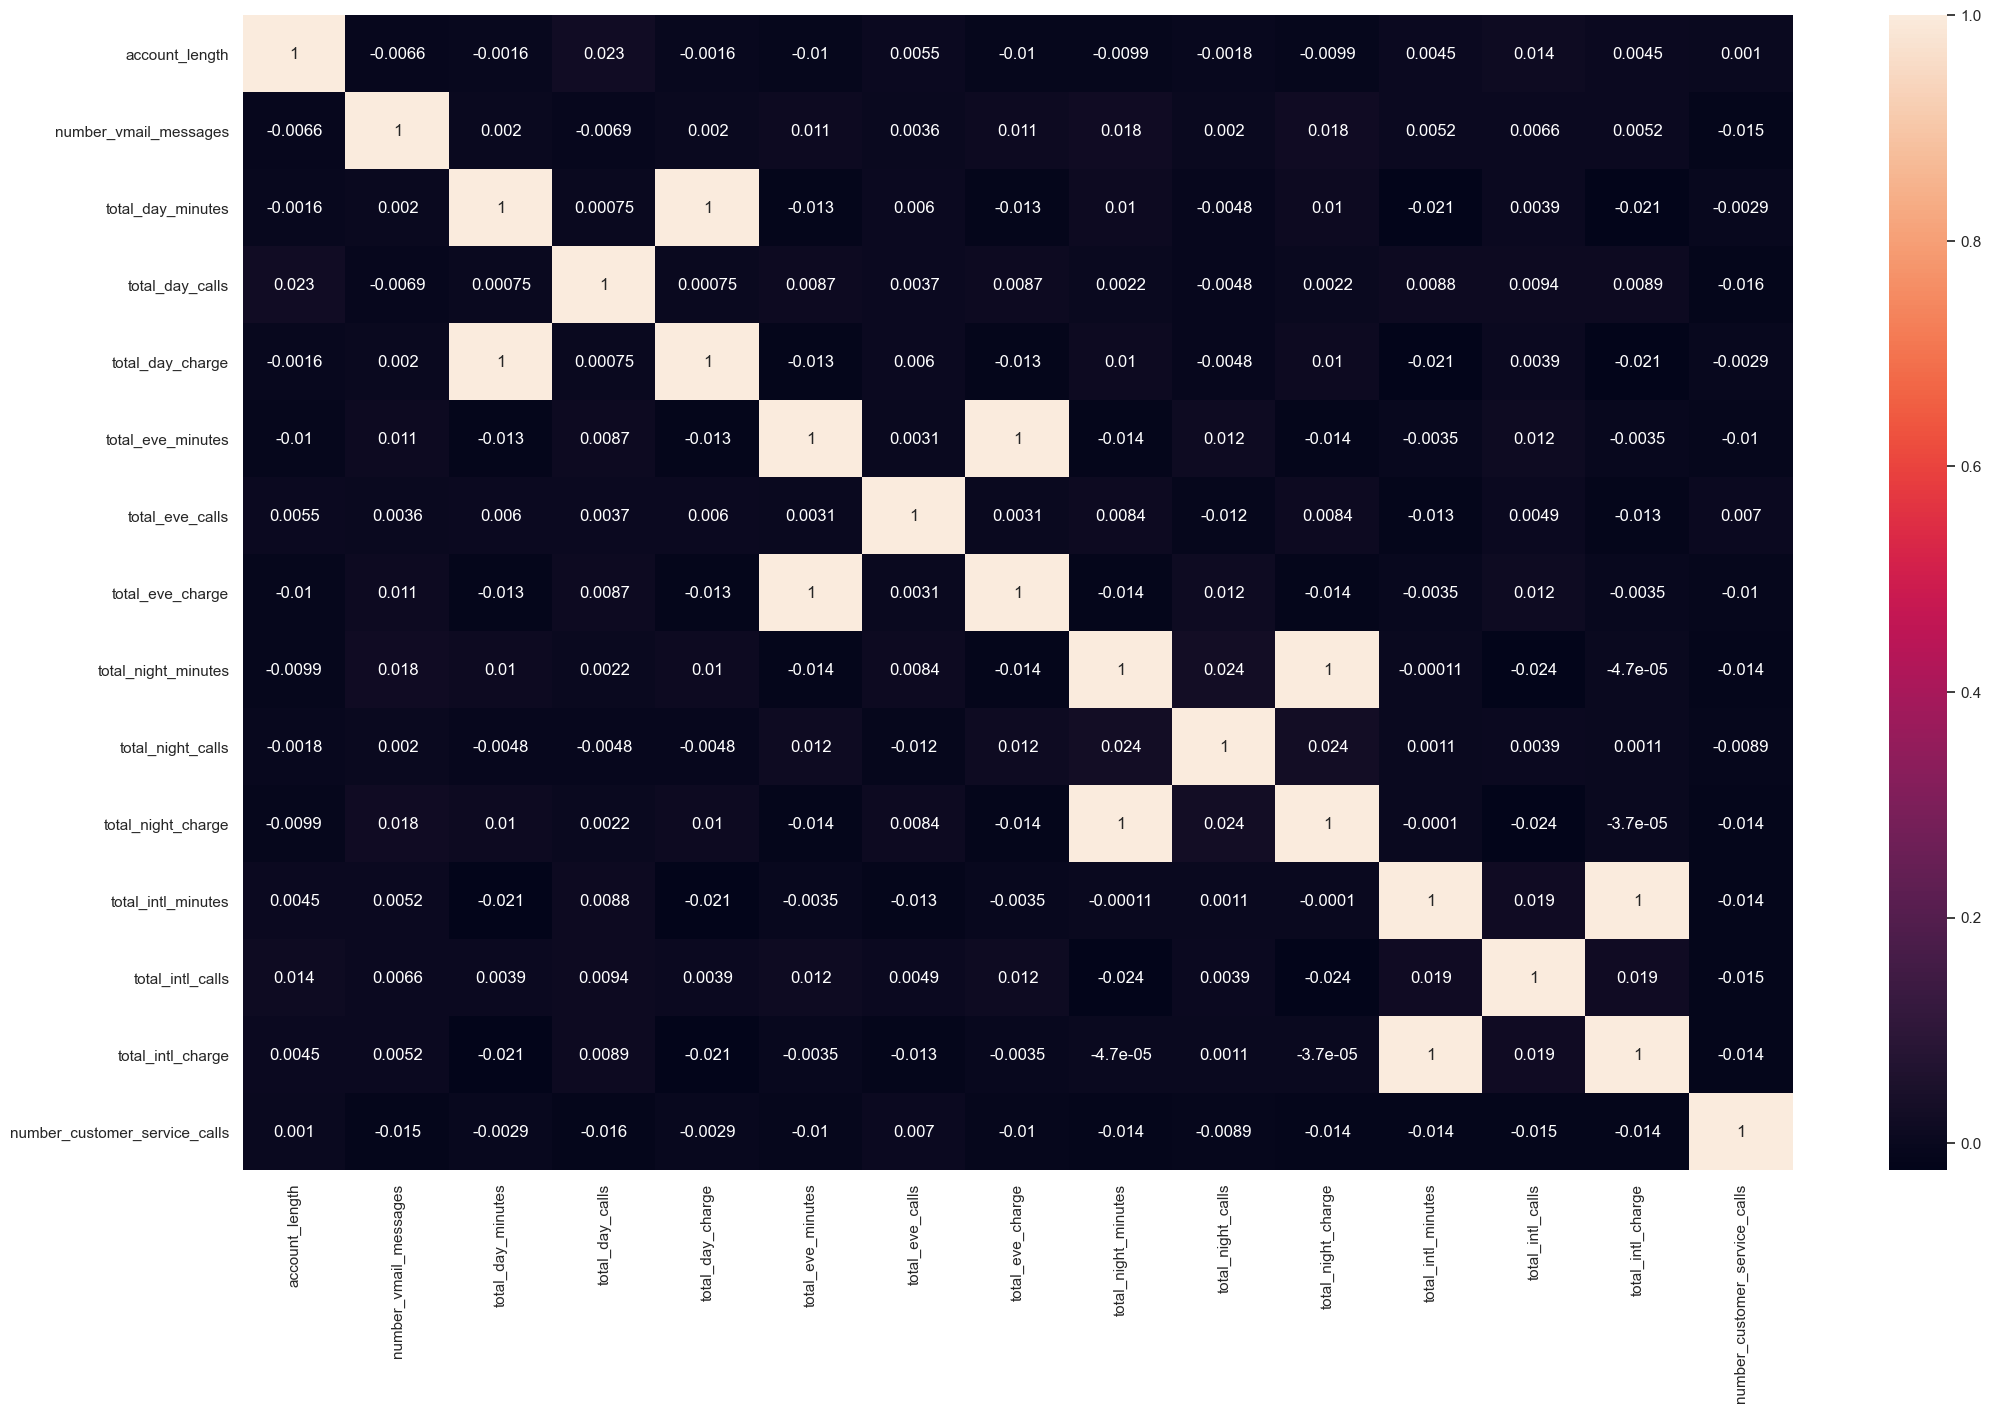

In [18]:
plt.figure(figsize=(25,15))
sns.heatmap(train_df.corr(),annot=True)
plt.show()

# Data Prepocesing

In [19]:
#Cek Missing Value
train_df.isnull().sum()

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

In [20]:
#Cek Duplikat Data
print(train_df.duplicated().sum())

0


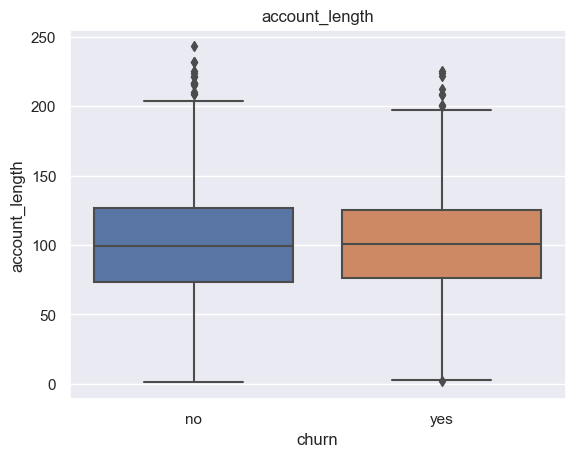

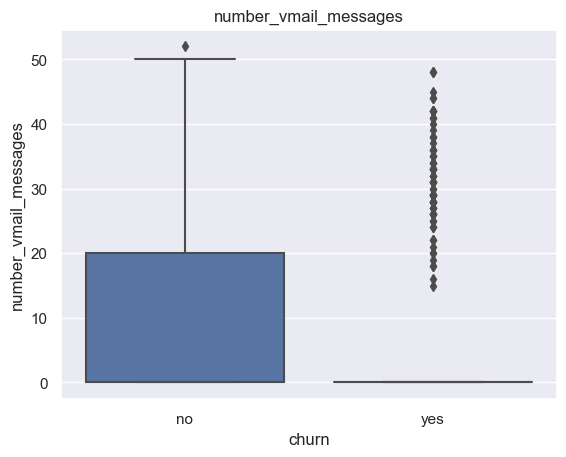

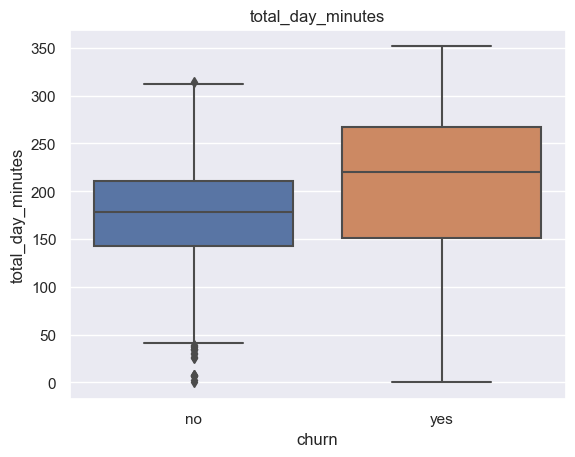

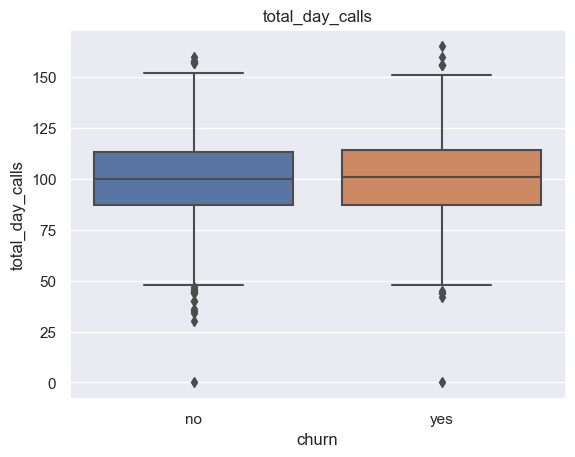

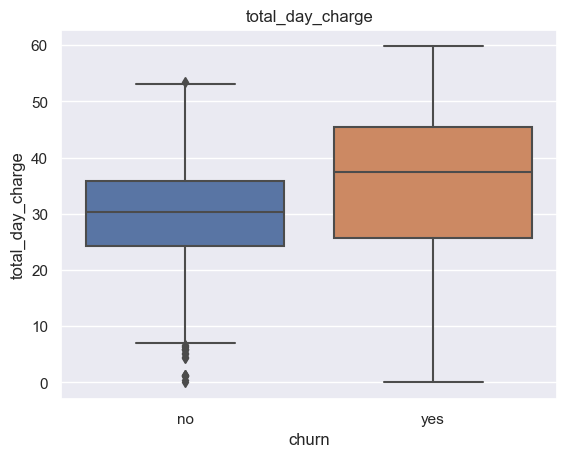

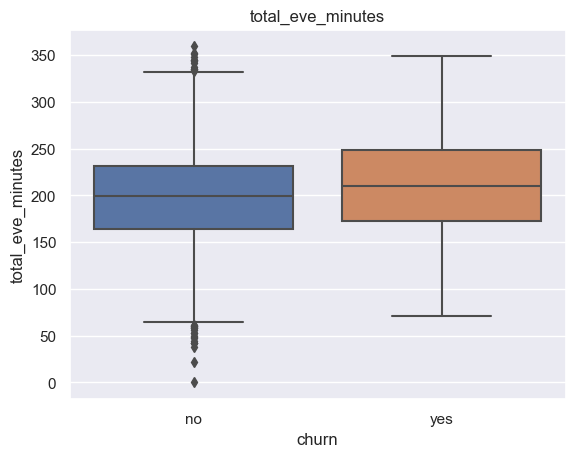

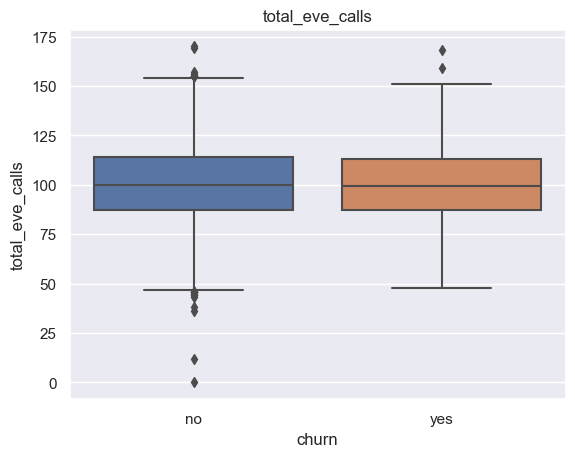

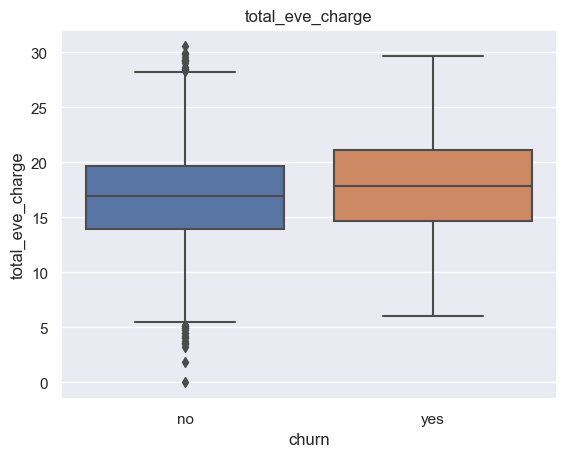

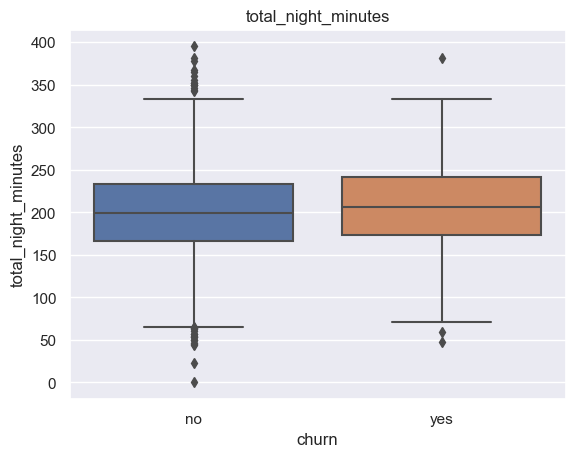

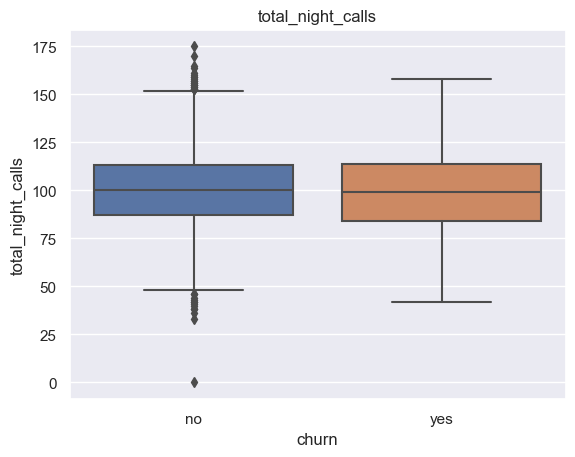

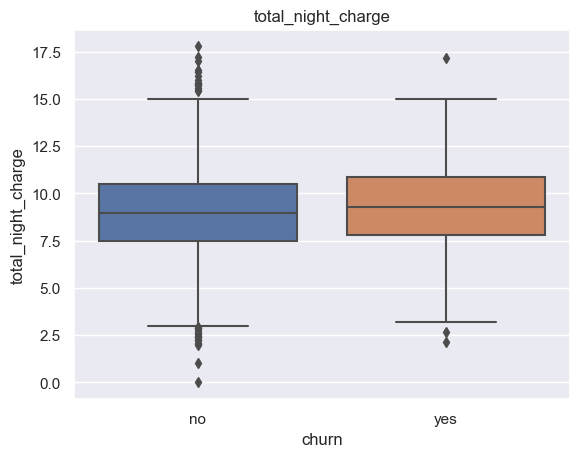

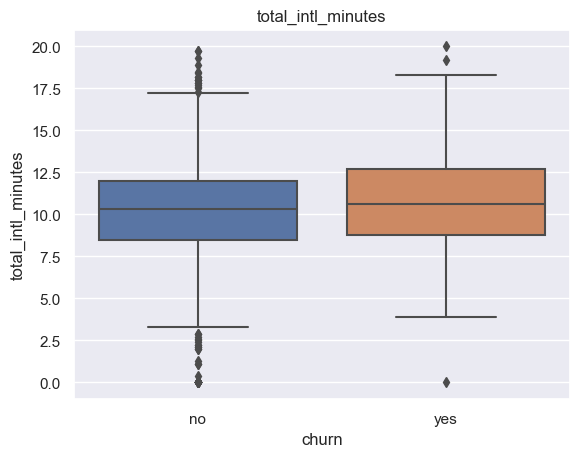

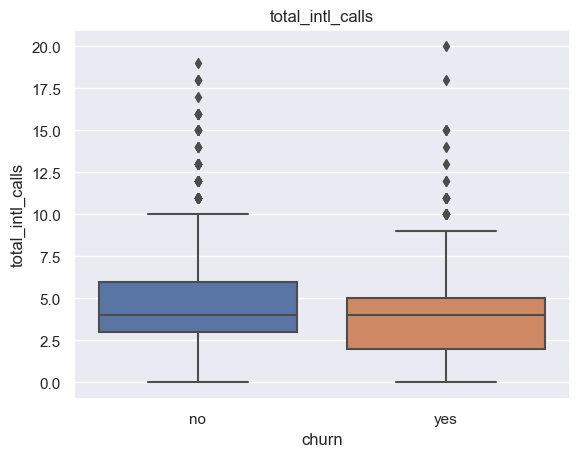

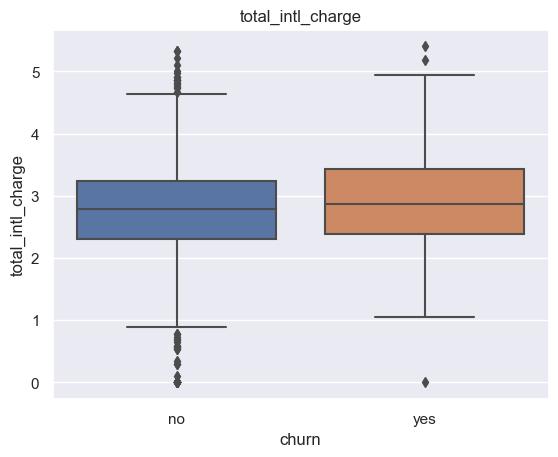

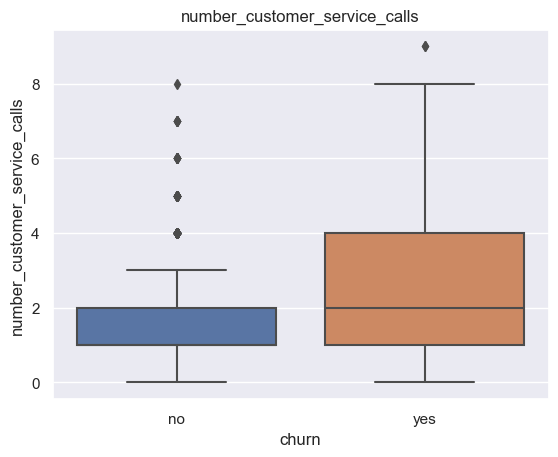

In [21]:
#Deteksi Outlier
for feature in num_var:
    if feature != 'churn':
        sns.boxplot(x ='churn', y = feature, data = train_df)
        plt.title(feature)
        plt.show()

setiap fitur memiliki outlier sehingga kita perlu menghapus outlier tersebut.
Outlier berisi beberapa informasi yang berguna. Jadi kita harus mengganti outlier dengan beberapa nilai penuh yang berarti. Kita bisa substitusi outlier dengan pembatasan quartil.

In [22]:
#Mengatasi outliers
def remove_outliers(train_df,labels):
    for label in labels:
        q1 = train_df[label].quantile(0.25)
        q3 = train_df[label].quantile(0.75)
        iqr = q3 - q1
        upper_bound = q3 + 1.5 * iqr
        lower_bound = q1 - 1.5 * iqr
        train_df[label] = train_df[label].mask(train_df[label]< lower_bound, lower_bound, axis=0)
        train_df[label] = train_df[label].mask(train_df[label]> upper_bound, upper_bound, axis=0)

    return train_df

In [23]:
train_df = remove_outliers(train_df, num_var)

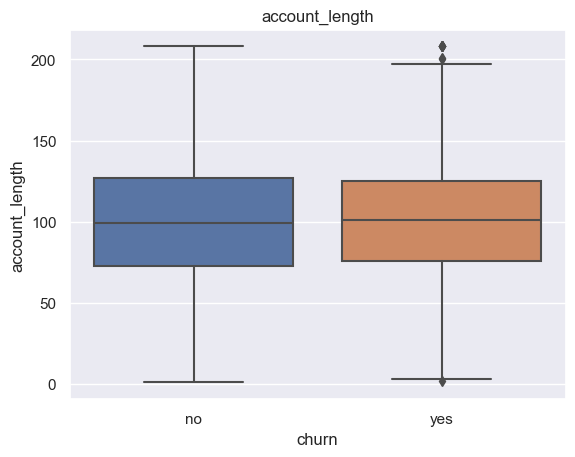

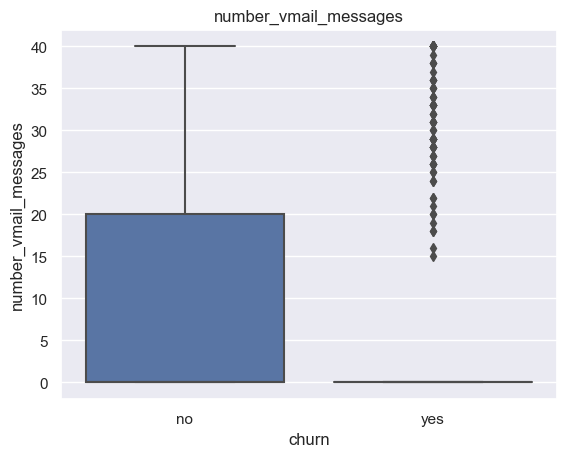

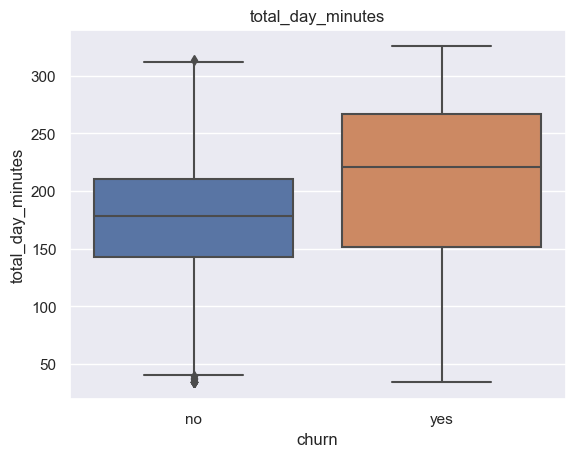

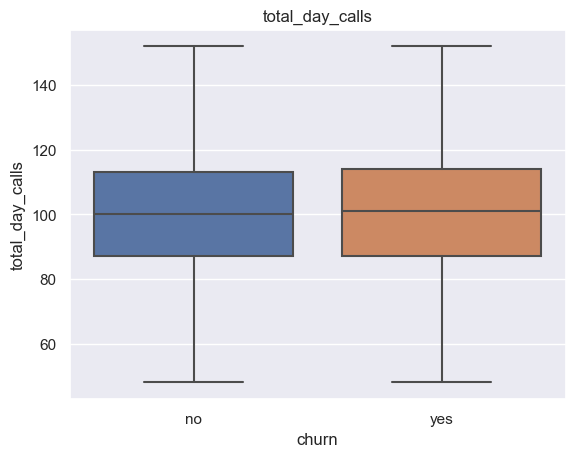

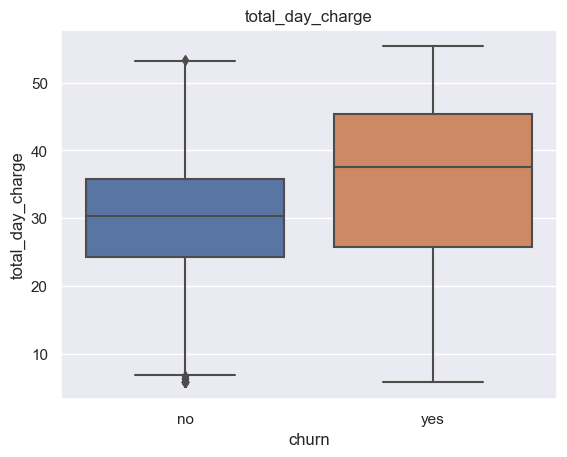

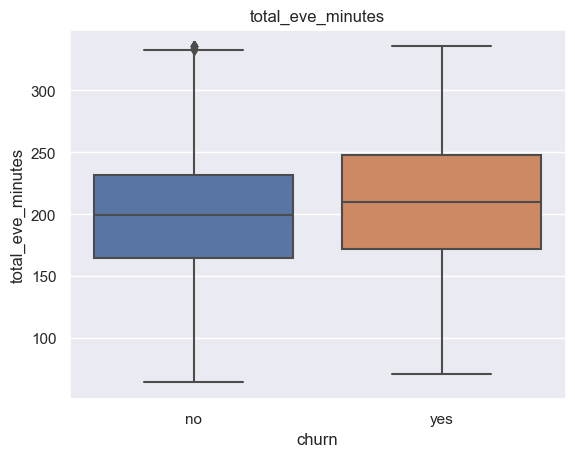

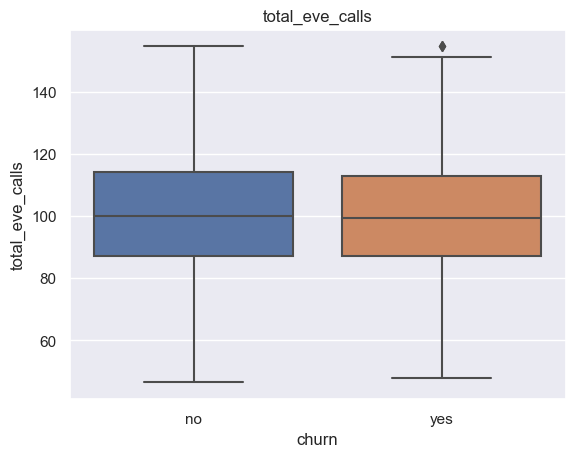

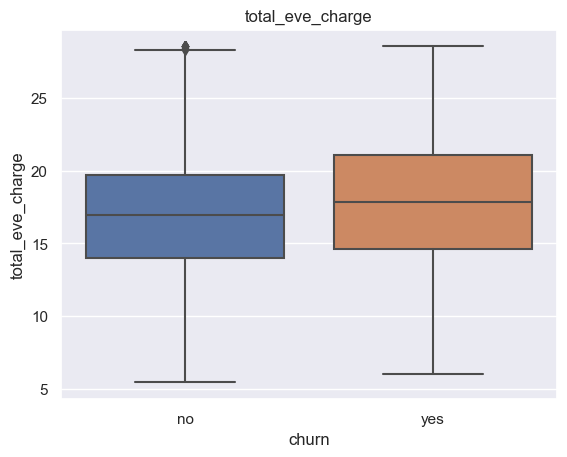

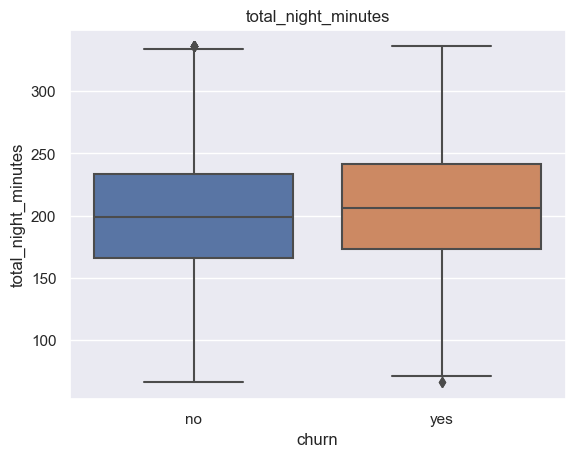

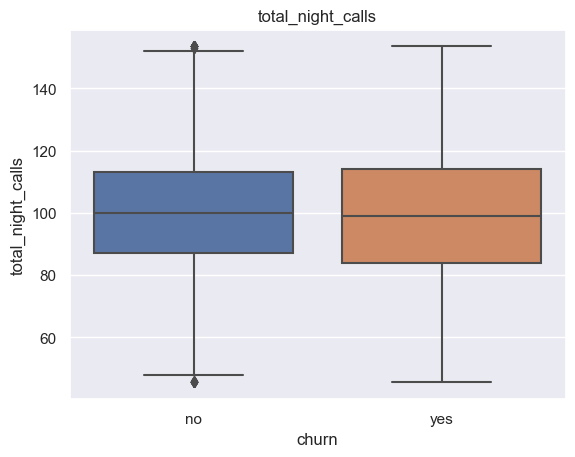

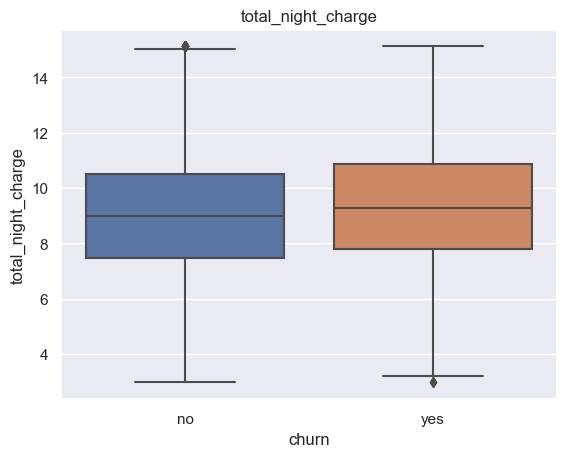

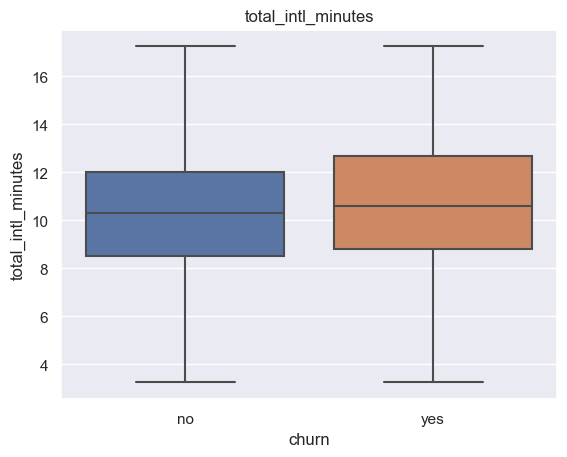

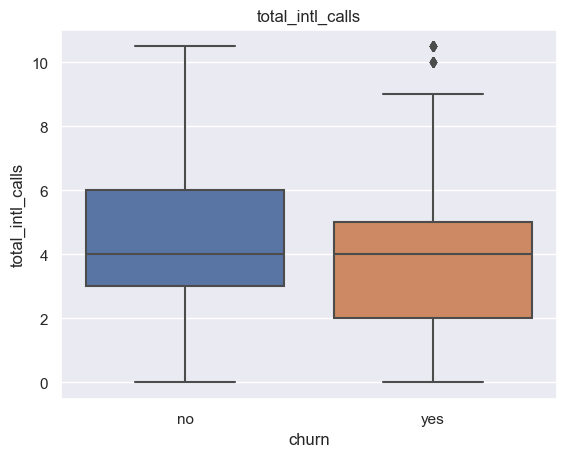

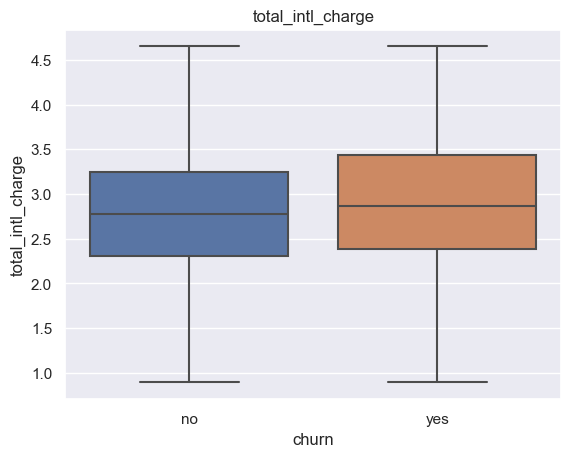

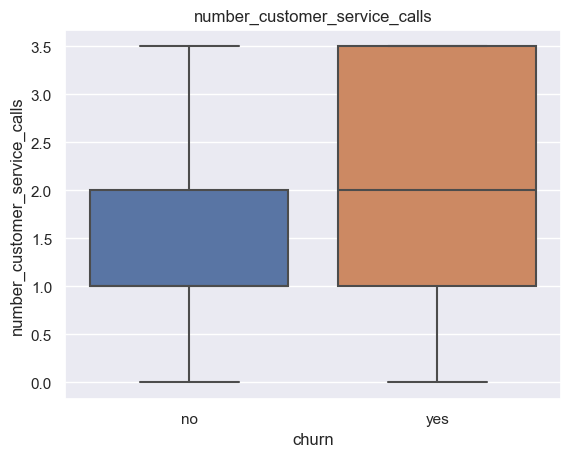

In [24]:
for feature in num_var:
    if feature != 'churn':
        sns.boxplot(x ='churn', y = feature, data = train_df)
        plt.title(feature)
        plt.show()

Encoding Data

Dari hasil data yang sebelumnya akan dilakukan encoding data, yaitu merubah data yang berbentuk string akan diubbah menjadi data berbentuk numerik menggunakan LabelEncoder().

In [25]:
pip install category_encoders

  Obtaining dependency information for category_encoders from https://files.pythonhosted.org/packages/1f/e2/495811f12b2e90753fff0e42a07adb0370a725de17cc23a579ac9d3ca67c/category_encoders-2.6.2-py2.py3-none-any.whl.metadata
   ---------------------------------------- 0.0/81.8 kB ? eta -:--:--
   ---------------------------------------- 0.0/81.8 kB ? eta -:--:--
   ------------------------------ --------- 61.4/81.8 kB ? eta -:--:--
   ---------------------------------------- 81.8/81.8 kB 1.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [26]:
train_df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.50,103.0,16.620,254.4,103.0,11.45,13.7,3.0,3.70,1.0,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.20,110.0,10.300,162.6,104.0,7.32,12.2,5.0,3.29,0.0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,64.15,88.0,5.455,196.9,89.0,8.86,6.6,7.0,1.78,2.0,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.30,122.0,12.610,186.9,121.0,8.41,10.1,3.0,2.73,3.0,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,335.55,108.0,28.515,212.6,118.0,9.57,7.5,7.0,2.03,3.0,no


In [27]:
import category_encoders as ce
hash_state = ce.HashingEncoder(cols = 'state')
train_df = hash_state.fit_transform(train_df)
test_df = hash_state.transform(test_df)
train_df.head()

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,account_length,area_code,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,0,0,0,0,1,0,0,0,107,area_code_415,...,103.0,16.620,254.4,103.0,11.45,13.7,3.0,3.70,1.0,no
1,0,1,0,0,0,0,0,0,137,area_code_415,...,110.0,10.300,162.6,104.0,7.32,12.2,5.0,3.29,0.0,no
2,0,0,0,0,1,0,0,0,84,area_code_408,...,88.0,5.455,196.9,89.0,8.86,6.6,7.0,1.78,2.0,no
3,0,0,0,0,1,0,0,0,75,area_code_415,...,122.0,12.610,186.9,121.0,8.41,10.1,3.0,2.73,3.0,no
4,0,0,0,0,1,0,0,0,121,area_code_510,...,108.0,28.515,212.6,118.0,9.57,7.5,7.0,2.03,3.0,no


In [28]:
from sklearn.preprocessing import OneHotEncoder
#mengkonversi area_code ke variabel numerik menggunakan one-hot encoder
onehot_area = OneHotEncoder()
onehot_area.fit(train_df[['area_code']])

# Train
encoded_values = onehot_area.transform(train_df[['area_code']])
train_df[onehot_area.categories_[0]] = encoded_values.toarray()
train_df = train_df.drop('area_code', axis=1)

# Test
encoded_values = onehot_area.transform(test_df[['area_code']])
test_df[onehot_area.categories_[0]] = encoded_values.toarray()
test_df = test_df.drop('area_code', axis=1)

In [29]:
train_df.head()

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,account_length,international_plan,...,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,area_code_408,area_code_415,area_code_510
0,0,0,0,0,1,0,0,0,107,no,...,103.0,11.45,13.7,3.0,3.70,1.0,no,0.0,1.0,0.0
1,0,1,0,0,0,0,0,0,137,no,...,104.0,7.32,12.2,5.0,3.29,0.0,no,0.0,1.0,0.0
2,0,0,0,0,1,0,0,0,84,yes,...,89.0,8.86,6.6,7.0,1.78,2.0,no,1.0,0.0,0.0
3,0,0,0,0,1,0,0,0,75,yes,...,121.0,8.41,10.1,3.0,2.73,3.0,no,0.0,1.0,0.0
4,0,0,0,0,1,0,0,0,121,no,...,118.0,9.57,7.5,7.0,2.03,3.0,no,0.0,0.0,1.0


In [30]:
train_df[['international_plan', 'voice_mail_plan', 'churn']][:5]

,international_plan,voice_mail_plan,churn
0,no,yes,no
1,no,no,no
2,yes,no,no
3,yes,no,no
4,no,yes,no


In [31]:
#Mengganti "no" menjadi "0" dan "yes" menjadi "1"
train_df.international_plan.replace(['no','yes'],[0,1],inplace = True)
train_df.voice_mail_plan.replace(['no','yes'],[0,1],inplace=True)
train_df.churn.replace(['no','yes'],[0,1],inplace = True)
test_df.international_plan.replace(['no','yes'],[0,1],inplace = True)
test_df.voice_mail_plan.replace(['no','yes'],[0,1],inplace = True)

In [32]:
train_df[['international_plan', 'voice_mail_plan', 'churn']][:5]

,international_plan,voice_mail_plan,churn
0,0,1,0
1,0,0,0
2,1,0,0
3,1,0,0
4,0,1,0


In [33]:
test_df.head().T

,0,1,2,3,4
col_0,0.00,0.00,0.00,0.00,1.00
col_1,1.00,1.00,0.00,0.00,0.00
col_2,0.00,0.00,0.00,0.00,0.00
col_3,0.00,0.00,0.00,0.00,0.00
col_4,0.00,0.00,0.00,1.00,0.00
col_5,0.00,0.00,0.00,0.00,0.00
col_6,0.00,0.00,0.00,0.00,0.00
col_7,0.00,0.00,1.00,0.00,0.00
id,1.00,2.00,3.00,4.00,5.00
account_length,128.00,118.00,62.00,93.00,174.00


In [34]:
x = train_df.drop('churn', axis=1)
y = train_df['churn']

In [35]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_transform = scaler.fit_transform(x)

In [36]:
x_transform = pd.DataFrame(x_transform,columns = x.columns)
x_transform

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,account_length,international_plan,...,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,area_code_408,area_code_415,area_code_510
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.512077,0.0,...,0.697990,0.532407,0.698251,0.746429,0.285714,0.747340,0.285714,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.657005,0.0,...,0.357864,0.541667,0.358333,0.639286,0.476190,0.638298,0.000000,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.400966,1.0,...,0.484948,0.402778,0.485082,0.239286,0.666667,0.236702,0.571429,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.357488,1.0,...,0.447897,0.699074,0.448045,0.489286,0.285714,0.489362,0.857143,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.579710,0.0,...,0.543118,0.671296,0.543519,0.303571,0.666667,0.303191,0.857143,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.396135,0.0,...,0.547193,0.310185,0.547634,0.503571,0.571429,0.502660,0.000000,0.0,1.0,0.0
4246,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.347826,0.0,...,0.445304,0.402778,0.445576,0.589286,0.571429,0.590426,0.857143,1.0,0.0,0.0
4247,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.357488,0.0,...,0.233744,0.541667,0.234053,0.260714,0.666667,0.257979,0.285714,1.0,0.0,0.0
4248,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.236715,0.0,...,0.857679,0.652778,0.857922,0.475000,0.476190,0.473404,0.571429,1.0,0.0,0.0


In [37]:
#Pembagian dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_transform, y, test_size=0.3, random_state=123)
print('Jumlah baris dan kolom dari x_train adalah:', x_train.shape,', sedangkan Jumlah baris dan kolom dari y_train adalah:', y_train.shape)
print('Presentase Churn di data Training adalah:')
print(y_train.value_counts(normalize=True))
print('Jumlah baris dan kolom dari x_test adalah:', x_test.shape,', sedangkan Jumlah baris dan kolom dari y_test adalah:', y_test.shape)
print('Presentase Churn di data Testing adalah:')
print(y_test.value_counts(normalize=True))

Jumlah baris dan kolom dari x_train adalah: (2975, 28) , sedangkan Jumlah baris dan kolom dari y_train adalah: (2975,)
Presentase Churn di data Training adalah:
0    0.857143
1    0.142857
Name: churn, dtype: float64
Jumlah baris dan kolom dari x_test adalah: (1275, 28) , sedangkan Jumlah baris dan kolom dari y_test adalah: (1275,)
Presentase Churn di data Testing adalah:
0    0.864314
1    0.135686
Name: churn, dtype: float64


In [38]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
knn_model = knn.fit(x_train, y_train)

In [39]:
#evaluasi model dengan confusion matrix
y_pred = knn_model.predict(x_test)
cnf_matrixknn=confusion_matrix(y_test,y_pred)
print('Confusion Matrix\n',cnf_matrixknn)

Confusion Matrix
 [[1089   13]
 [ 151   22]]


c:\Users\ASUS\anaconda3\envs\ds-marketing\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


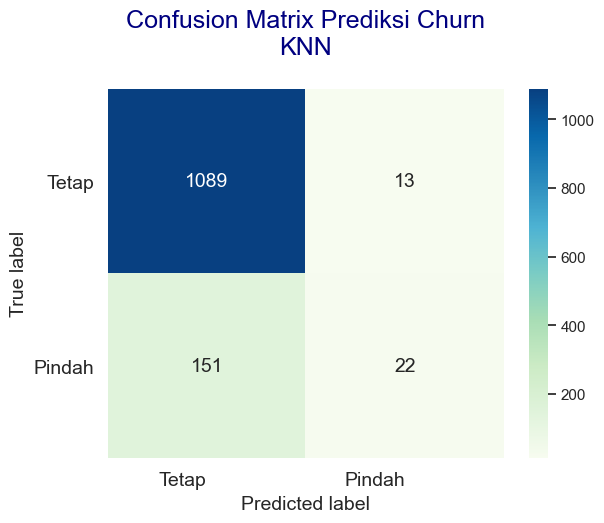

In [40]:
confusion_matrix_knn = pd.DataFrame((confusion_matrix(y_test, y_pred)), ('Tetap', 'Pindah'), ('Tetap', 'Pindah'))
plt.figure()
heatmap = sns.heatmap(confusion_matrix_knn, annot=True, annot_kws={'size': 14}, fmt='d', cmap='GnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
plt.title('Confusion Matrix Prediksi Churn\nKNN\n', fontsize=18, color='navy')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [41]:
# Print classification report
print('Classification Report Prediksi Churn (KNN) :')
print(classification_report(y_test, y_pred))

Classification Report Prediksi Churn (KNN) :
              precision    recall  f1-score   support

           0       0.88      0.99      0.93      1102
           1       0.63      0.13      0.21       173

    accuracy                           0.87      1275
   macro avg       0.75      0.56      0.57      1275
weighted avg       0.84      0.87      0.83      1275



In [42]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
rf_model = rf.fit(x_train, y_train)

In [43]:
#evaluasi model dengan confusion matrix
from sklearn.metrics import confusion_matrix
y_pred = rf_model.predict(x_test)
cnf_matrixrf=confusion_matrix(y_test,y_pred)
print('Confusion Matrix\n',cnf_matrixrf)

Confusion Matrix
 [[1099    3]
 [  55  118]]


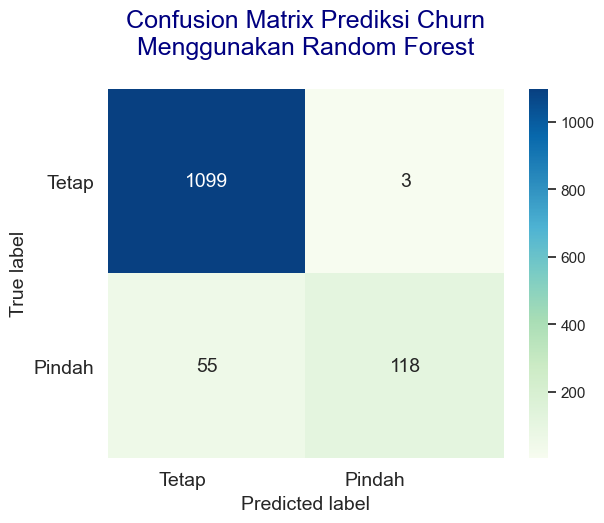

In [44]:
confusion_matrix_rf = pd.DataFrame((confusion_matrix(y_test, y_pred)), ('Tetap', 'Pindah'), ('Tetap', 'Pindah'))
plt.figure()
heatmap = sns.heatmap(confusion_matrix_rf, annot=True, annot_kws={'size': 14}, fmt='d', cmap='GnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
plt.title('Confusion Matrix Prediksi Churn\nMenggunakan Random Forest\n', fontsize=18, color='navy')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [45]:
from sklearn.metrics import classification_report
# Print classification report
print('Classification Report Prediksi Churn (Random Forest) :')
print(classification_report(y_test, y_pred))

Classification Report Prediksi Churn (Random Forest) :
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1102
           1       0.98      0.68      0.80       173

    accuracy                           0.95      1275
   macro avg       0.96      0.84      0.89      1275
weighted avg       0.96      0.95      0.95      1275



In [46]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
dtc_model = dtc.fit(x_train, y_train)

In [47]:
#evaluasi model dengan confusion matrix
from sklearn.metrics import confusion_matrix
y_pred = dtc_model.predict(x_test)
cnf_matrixdtc=confusion_matrix(y_test,y_pred)
print('Confusion Matrix\n',cnf_matrixdtc)

Confusion Matrix
 [[1062   40]
 [  46  127]]


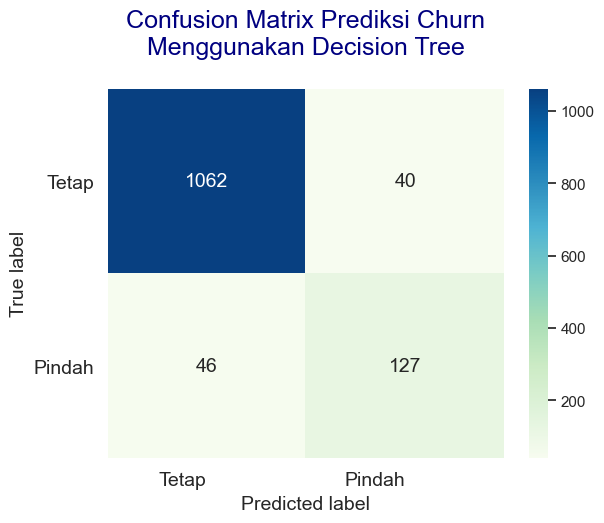

In [48]:
confusion_matrix_dtc = pd.DataFrame((confusion_matrix(y_test, y_pred)), ('Tetap', 'Pindah'), ('Tetap', 'Pindah'))
plt.figure()
heatmap = sns.heatmap(confusion_matrix_dtc, annot=True, annot_kws={'size': 14}, fmt='d', cmap='GnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
plt.title('Confusion Matrix Prediksi Churn\nMenggunakan Decision Tree\n', fontsize=18, color='navy')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [49]:
# Print classification report
print('Classification Report Prediksi Churn (Decision Tree) :')
print(classification_report(y_test, y_pred))

Classification Report Prediksi Churn (Decision Tree) :
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1102
           1       0.76      0.73      0.75       173

    accuracy                           0.93      1275
   macro avg       0.86      0.85      0.85      1275
weighted avg       0.93      0.93      0.93      1275



Hyperparameter Tuning

Mengimplementasikan hyperparameter tuning pada model Random Forest

In [50]:
hyperparams = {
    'max_depth':[2,3,5,10,20],
    'min_samples_leaf':[5,10,20,50,100,200],
    'n_estimators':[10,25,30,50,100,200]
}

In [51]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(estimator = rf_model, param_grid = hyperparams, cv = 5, n_jobs = -1, verbose = 1, scoring = 'accuracy')
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [52]:
grid_search.best_params_

{'max_depth': 10, 'min_samples_leaf': 5, 'n_estimators': 100}

In [53]:
grid_search.best_score_

0.9411764705882353

In [54]:
rf_best = grid_search.best_estimator_
rfht_model = rf_best.fit(x_train, y_train)
hasil_rf = rfht_model.predict(x_test)

In [55]:
print('Laporan Klasifikasi Model Random Forest dengan hyperparameter tuning\n\n',
      classification_report(y_test, hasil_rf,target_names=['Pelanggan Tetap', 'Pelanggan Churn']))

Laporan Klasifikasi Model Random Forest dengan hyperparameter tuning

                  precision    recall  f1-score   support

Pelanggan Tetap       0.93      1.00      0.96      1102
Pelanggan Churn       0.96      0.55      0.70       173

       accuracy                           0.94      1275
      macro avg       0.95      0.78      0.83      1275
   weighted avg       0.94      0.94      0.93      1275



In [56]:
id_submission = test_df.id
test = test_df.drop('id', axis=1)

In [57]:
test = scaler.transform(test)

In [58]:
#Prediksi data tes
y_pred_knn = knn_model.predict(test)
y_pred_rf  = rf_model.predict(test)
y_pred_dtc = dtc_model.predict(test)
y_pred_rfht = rfht_model.predict(test)


c:\Users\ASUS\anaconda3\envs\ds-marketing\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [59]:
submit_knn = pd.DataFrame({'id':id_submission, 'churn':y_pred_knn})
submit_rf  = pd.DataFrame({'id':id_submission, 'churn':y_pred_rf})
submit_dtc = pd.DataFrame({'id':id_submission, 'churn':y_pred_dtc})
submit_rfht = pd.DataFrame({'id':id_submission, 'churn':y_pred_rfht})

In [60]:
submit_knn.churn.replace([0,1],['no','yes'], inplace=True)
submit_rf.churn.replace([0,1],['no','yes'], inplace=True)
submit_dtc.churn.replace([0,1],['no','yes'], inplace=True)
submit_rfht.churn.replace([0,1],['no','yes'], inplace=True)

In [61]:
Numcusstayed_KNN =  submit_knn[submit_knn.churn == 'no'].shape[0]
Numcuschurned_KNN = submit_knn[submit_knn.churn == 'yes'].shape[0]
print('Customers Stayed:', Numcusstayed_KNN)
print('Customer Churned:', Numcuschurned_KNN)

Customers Stayed: 727
Customer Churned: 23


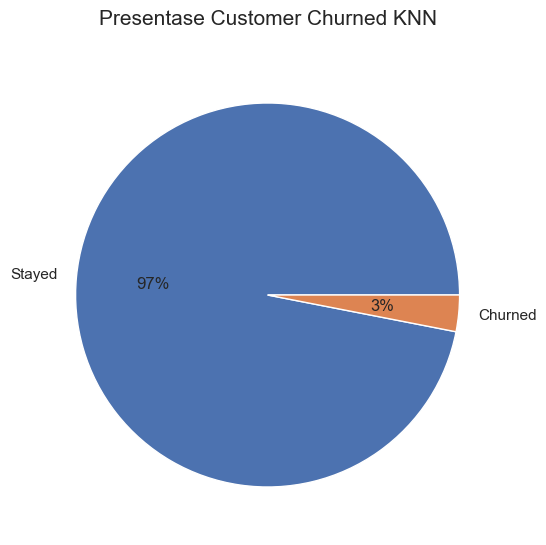

In [62]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis = ('equal')
labels = ['Stayed', 'Churned']
churn = submit_knn.churn.value_counts()
ax.pie(churn, labels = labels, autopct='%.0f%%')
plt.title('Presentase Customer Churned KNN\n', fontsize=15)
plt.show()

In [63]:
Numcusstayed_rf =  submit_rf[submit_rf.churn == 'no'].shape[0]
Numcuschurned_rf = submit_rf[submit_rf.churn == 'yes'].shape[0]
print('Customers Stayed :', Numcusstayed_rf)
print('Customer Churned :', Numcuschurned_rf)

Customers Stayed : 671
Customer Churned : 79


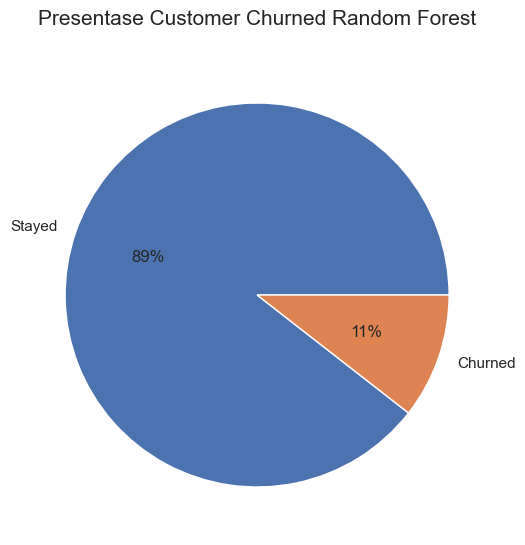

In [64]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis = ('equal')
labels = ['Stayed', 'Churned']
churn = submit_rf.churn.value_counts()
ax.pie(churn, labels = labels, autopct='%.0f%%')
plt.title('Presentase Customer Churned Random Forest\n', fontsize=15)
plt.show()

In [65]:
Numcusstayed_dtc =  submit_dtc[submit_dtc.churn == 'no'].shape[0]
Numcuschurned_dtc  = submit_dtc[submit_dtc.churn == 'yes'].shape[0]
print('Customers Stayed :', Numcusstayed_dtc)
print('Customer Churned :', Numcuschurned_dtc)

Customers Stayed : 625
Customer Churned : 125


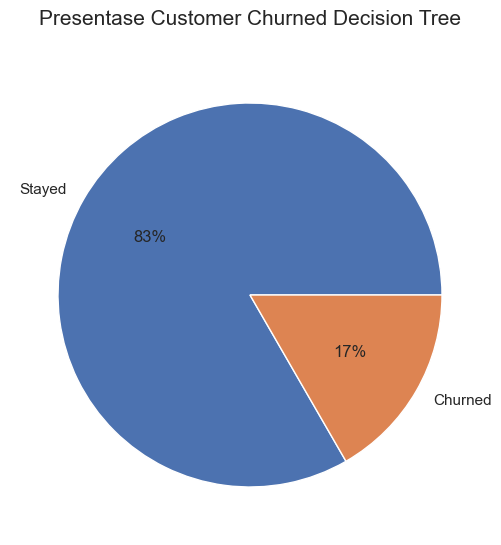

In [66]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis = ('equal')
labels = ['Stayed', 'Churned']
churn = submit_dtc.churn.value_counts()
ax.pie(churn, labels = labels, autopct='%.0f%%')
plt.title('Presentase Customer Churned Decision Tree\n', fontsize=15)
plt.show()

In [67]:
Numcusstayed_rfht =  submit_rfht[submit_rfht.churn == 'no'].shape[0]
Numcuschurned_rfht = submit_rfht[submit_rfht.churn == 'yes'].shape[0]
print('Customers Stayed :', Numcusstayed_rfht)
print('Customer Churned :', Numcuschurned_rfht)

Customers Stayed : 684
Customer Churned : 66


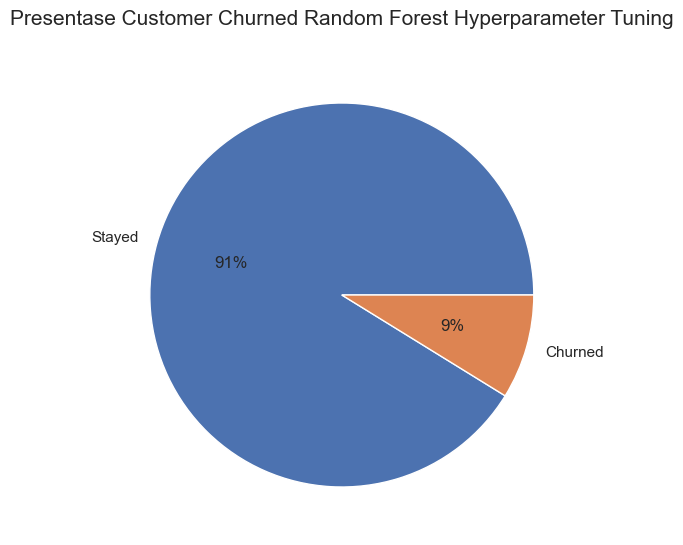

In [68]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis = ('equal')
labels = ['Stayed', 'Churned']
churn = submit_rfht.churn.value_counts()
ax.pie(churn, labels = labels, autopct='%.0f%%')
plt.title('Presentase Customer Churned Random Forest Hyperparameter Tuning\n', fontsize=15)
plt.show()

In [69]:
#Memasukkan hasil prediksi ke file csv
submit_knn.to_csv('churn_knn.csv',index=False)
submit_rf.to_csv('churn_rf.csv',index=False)
submit_dtc.to_csv('churn_dtc.csv',index=False)
submit_rfht.to_csv('churn_rfht.csv',index=False)